# IMPORTATION OF LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# LOADING OF DATASET

In [2]:
df= pd.read_csv('globalterrorismdb_0718dist.csv')
df.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# EXPLORATORY DATA ANALYSIS

In [3]:
#CHECKING FOR THE NUMBER OF FEATURES
df.shape

(181691, 135)

# PROCEDURE 
Due to the large number of features present in the dataset, for us to see all columns and understand the feaures properly we would split the dataset into seven groups, then call the df.columns, df.nunique(), df.corr(),df.isna().sum() functions and plot the heapmap for each group. This will provide us with information regarding the redundant features that needs to be dropped.

In [4]:
#FIRST GROUP
df1 = df.iloc[:,0:21]
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1


In [5]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2'],
      dtype='object')

In [6]:
df1.nunique()

eventid        181691
iyear              47
imonth             13
iday               32
approxdate       2244
extended            2
resolution       1859
country           205
country_txt       205
region             12
region_txt         12
provstate        2854
city            36674
latitude        48322
longitude       48039
specificity         5
vicinity            3
location        44109
summary        112492
crit1               2
crit2               2
dtype: int64

In [7]:
df1.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
approxdate     172452
extended            0
resolution     179471
country             0
country_txt         0
region              0
region_txt          0
provstate         421
city              434
latitude         4556
longitude        4557
specificity         6
vicinity            0
location       126196
summary         66129
crit1               0
crit2               0
dtype: int64

In [8]:
df1.count()

eventid        181691
iyear          181691
imonth         181691
iday           181691
approxdate       9239
extended       181691
resolution       2220
country        181691
country_txt    181691
region         181691
region_txt     181691
provstate      181270
city           181257
latitude       177135
longitude      177134
specificity    181685
vicinity       181691
location        55495
summary        115562
crit1          181691
crit2          181691
dtype: int64

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
country,181691.0,1.319685e+02,1.124145e+02,4.000000e+00,7.800000e+01,9.800000e+01,1.600000e+02,1.004000e+03
region,181691.0,7.160938e+00,2.933408e+00,1.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
latitude,177135.0,2.349834e+01,1.856924e+01,-5.315461e+01,1.151005e+01,3.146746e+01,3.468509e+01,7.463355e+01
longitude,177134.0,-4.586957e+02,2.047790e+05,-8.618590e+07,4.545640e+00,4.324651e+01,6.871033e+01,1.793667e+02
specificity,181685.0,1.451452e+00,9.954295e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [10]:
df1.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,0.178567,-0.000269,-0.084599,-0.012291,-0.006646,-0.038480
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.309274,0.004351,-0.084198,0.073678,0.025521,-0.013163
latitude,0.166886,0.166933,-0.015978,0.003423,-0.024749,0.178567,0.309274,1.000000,0.001463,-0.018811,0.005844,0.021533,-0.004104
longitude,0.003907,0.003917,-0.003880,-0.002285,0.000523,-0.000269,0.004351,0.001463,1.000000,0.001065,0.000594,-0.000258,-0.000200
specificity,0.030641,0.030626,0.003621,-0.006991,0.057897,-0.084599,-0.084198,-0.018811,0.001065,1.000000,-0.049855,0.014323,0.000943


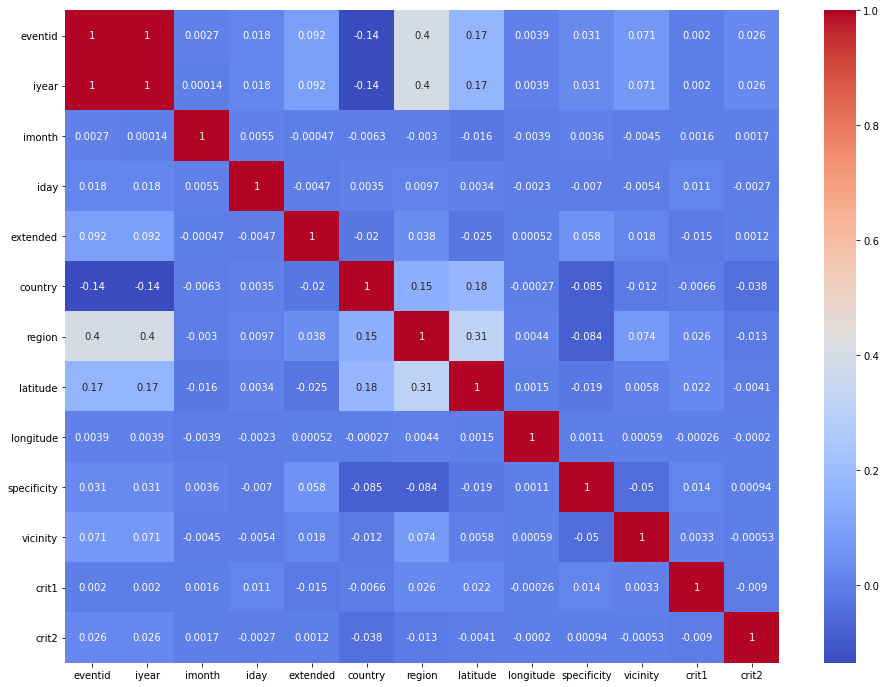

In [11]:
plt.figure(figsize=(16,12))
sns.heatmap(df1.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [12]:
#GROUP 2
df2 = df.iloc[:,21:41]
df2.head()

,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1
0,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0
1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0
2,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0
3,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0
4,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0


In [13]:
df2.columns

Index(['crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1'],
      dtype='object')

In [14]:
df2.nunique()

crit3                   2
doubtterr               3
alternative             5
alternative_txt         5
multiple                2
success                 2
suicide                 2
attacktype1             9
attacktype1_txt         9
attacktype2             9
attacktype2_txt         9
attacktype3             8
attacktype3_txt         8
targtype1              22
targtype1_txt          22
targsubtype1          112
targsubtype1_txt      112
corp1               33238
target1             86006
natlty1               215
dtype: int64

In [15]:
df2.isna().sum()

crit3                    0
doubtterr                1
alternative         152680
alternative_txt     152680
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2         175377
attacktype2_txt     175377
attacktype3         181263
attacktype3_txt     181263
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1               1559
dtype: int64

In [16]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
crit3,181691.0,0.875668,0.329961,0.0,1.0,1.0,1.0,1.0
doubtterr,181690.0,-0.523171,2.455819,-9.0,0.0,0.0,0.0,1.0
alternative,29011.0,1.292923,0.703729,1.0,1.0,1.0,1.0,5.0
multiple,181690.0,0.137773,0.344663,0.0,0.0,0.0,0.0,1.0
success,181691.0,0.889598,0.313391,0.0,1.0,1.0,1.0,1.0
suicide,181691.0,0.036507,0.187549,0.0,0.0,0.0,0.0,1.0
attacktype1,181691.0,3.247547,1.915772,1.0,2.0,3.0,3.0,9.0
attacktype2,6314.0,3.719512,2.272023,1.0,2.0,2.0,7.0,9.0
attacktype3,428.0,5.245327,2.246642,1.0,2.0,7.0,7.0,8.0
targtype1,181691.0,8.439719,6.653838,1.0,3.0,4.0,14.0,22.0


In [17]:
df2.corr()

,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1
crit3,1.000000,-0.233282,0.733615,0.047007,-0.013678,-0.026620,0.028124,0.209391,0.033674,0.251296,0.196012,-0.083928
doubtterr,-0.233282,1.000000,-0.013380,0.046812,-0.028236,0.056836,-0.068122,-0.173796,-0.004277,0.004962,0.006850,0.039491
alternative,0.733615,-0.013380,1.000000,-0.000581,0.017800,-0.051333,0.019050,0.235857,0.117348,0.639119,0.594301,0.005742
multiple,0.047007,0.046812,-0.000581,1.000000,0.020310,0.030750,0.081873,0.152746,0.173649,0.079643,0.080906,-0.013767
success,-0.013678,-0.028236,0.017800,0.020310,1.000000,-0.031155,0.048408,0.061879,0.086364,-0.059637,0.038192,-0.007157
suicide,-0.026620,0.056836,-0.051333,0.030750,-0.031155,1.000000,-0.029962,-0.215342,-0.431717,-0.023440,-0.029521,-0.009207
attacktype1,0.028124,-0.068122,0.019050,0.081873,0.048408,-0.029962,1.000000,-0.314973,-0.117710,0.014513,0.022159,0.013769
attacktype2,0.209391,-0.173796,0.235857,0.152746,0.061879,-0.215342,-0.314973,1.000000,-0.357378,0.202041,0.199101,0.007363
attacktype3,0.033674,-0.004277,0.117348,0.173649,0.086364,-0.431717,-0.117710,-0.357378,1.000000,0.248869,0.252763,0.041005
targtype1,0.251296,0.004962,0.639119,0.079643,-0.059637,-0.023440,0.014513,0.202041,0.248869,1.000000,0.982772,-0.034994


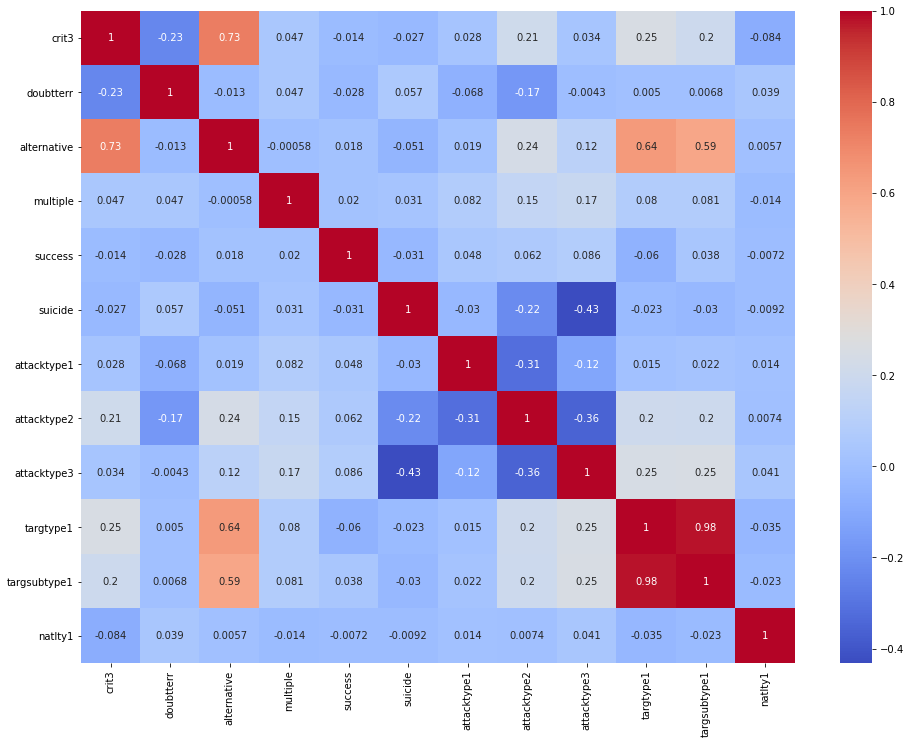

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [19]:
#GROUP 3
df3 = df.iloc[:,41:61]
df3.head()

,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2
0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN
2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
4,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN


In [20]:
df3.columns

Index(['natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname',
       'gname2'],
      dtype='object')

In [21]:
df3.isna().sum()

natlty1_txt           1559
targtype2           170547
targtype2_txt       170547
targsubtype2        171006
targsubtype2_txt    171006
corp2               171574
target2             170671
natlty2             170863
natlty2_txt         170863
targtype3           180515
targtype3_txt       180515
targsubtype3        180594
targsubtype3_txt    180594
corp3               180665
target3             180516
natlty3             180544
natlty3_txt         180544
gname                    0
gsubname            175801
gname2              179678
dtype: int64

In [22]:
df3.nunique()

natlty1_txt          215
targtype2             22
targtype2_txt         22
targsubtype2         107
targsubtype2_txt     107
corp2               2691
target2             5043
natlty2              158
natlty2_txt          158
targtype3             20
targtype3_txt         20
targsubtype3          92
targsubtype3_txt      92
corp3                422
target3              720
natlty3              110
natlty3_txt          110
gname               3537
gsubname            1183
gname2               433
dtype: int64

In [23]:
df3.describe()

,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3
count,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000
mean,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952
std,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295
min,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000
25%,4.000000,34.000000,92.000000,3.000000,33.000000,75.000000
50%,14.000000,67.000000,98.000000,14.000000,67.000000,110.000000
75%,14.000000,69.000000,182.000000,14.000000,73.000000,182.000000
max,22.000000,113.000000,1004.000000,22.000000,113.000000,1004.000000


In [24]:
df3.corr()

,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3
targtype2,1.000000,0.972827,-0.035200,0.240236,0.259510,0.030995
targsubtype2,0.972827,1.000000,-0.021441,0.270355,0.305731,0.014169
natlty2,-0.035200,-0.021441,1.000000,-0.039912,-0.022512,0.323694
targtype3,0.240236,0.270355,-0.039912,1.000000,0.975187,0.006638
targsubtype3,0.259510,0.305731,-0.022512,0.975187,1.000000,0.001019
natlty3,0.030995,0.014169,0.323694,0.006638,0.001019,1.000000


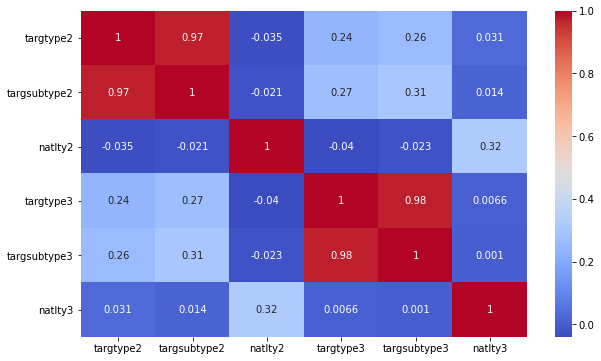

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df3.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [26]:
#GROUP 4
df4 = df.iloc[:,61:81]
df4.head()

,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df4.columns

Index(['gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim'],
      dtype='object')

In [28]:
df4.isna().sum()

gsubname2         181531
gname3            181367
gsubname3         181671
motive            131130
guncertain1          380
guncertain2       179736
guncertain3       181371
individual             0
nperps             71115
nperpcap           69489
claimed            66120
claimmode         162608
claimmode_txt     162608
claim2            179801
claimmode2        181075
claimmode2_txt    181075
claim3            181373
claimmode3        181558
claimmode3_txt    181558
compclaim         176852
dtype: int64

In [29]:
df4.nunique()

gsubname2            60
gname3              116
gsubname3            14
motive            14490
guncertain1           2
guncertain2           2
guncertain3           2
individual            2
nperps              113
nperpcap             50
claimed               3
claimmode            10
claimmode_txt        10
claim2                3
claimmode2            9
claimmode2_txt        9
claim3                2
claimmode3            8
claimmode3_txt        8
compclaim             3
dtype: int64

In [30]:
df4.describe()

,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim
count,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000
mean,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342
std,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620
min,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000
25%,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,6.000000,0.000000,6.000000,0.000000,4.000000,-9.000000
50%,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,8.000000,0.000000,7.000000,0.000000,7.000000,-9.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,1.000000,10.000000,1.000000,9.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,25000.000000,406.000000,1.000000,10.000000,1.000000,10.000000,1.000000,10.000000,1.000000


In [31]:
df4.corr()

,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim
guncertain1,1.000000,0.601330,0.521324,-0.000614,-0.002415,-0.018101,-0.042083,0.025651,-0.081652,-0.043828,0.067949,-0.098171,0.020751
guncertain2,0.601330,1.000000,0.602797,0.037630,-0.006112,-0.060473,-0.138330,0.016028,-0.102625,-0.062487,0.104466,0.164162,-0.142454
guncertain3,0.521324,0.602797,1.000000,NaN,0.107850,0.092288,-0.173625,0.138413,-0.023028,0.174932,-0.018241,0.263977,0.007632
individual,-0.000614,0.037630,NaN,1.000000,0.020067,0.011036,0.028876,0.009392,-0.005851,NaN,NaN,NaN,-0.016101
nperps,-0.002415,-0.006112,0.107850,0.020067,1.000000,0.022733,-0.011764,-0.005658,-0.016653,0.058310,-0.094615,0.214576,-0.238071
nperpcap,-0.018101,-0.060473,0.092288,0.011036,0.022733,1.000000,0.004231,0.091539,-0.028962,0.026740,-0.043835,-0.093756,-0.126868
claimed,-0.042083,-0.138330,-0.173625,0.028876,-0.011764,0.004231,1.000000,-0.036218,0.350384,-0.049181,0.131331,0.142088,0.383212
claimmode,0.025651,0.016028,0.138413,0.009392,-0.005658,0.091539,-0.036218,1.000000,-0.058337,0.584601,-0.130080,0.544986,0.067994
claim2,-0.081652,-0.102625,-0.023028,-0.005851,-0.016653,-0.028962,0.350384,-0.058337,1.000000,0.004339,0.534154,0.142088,0.148490
claimmode2,-0.043828,-0.062487,0.174932,NaN,0.058310,0.026740,-0.049181,0.584601,0.004339,1.000000,-0.077505,0.725724,-0.025029


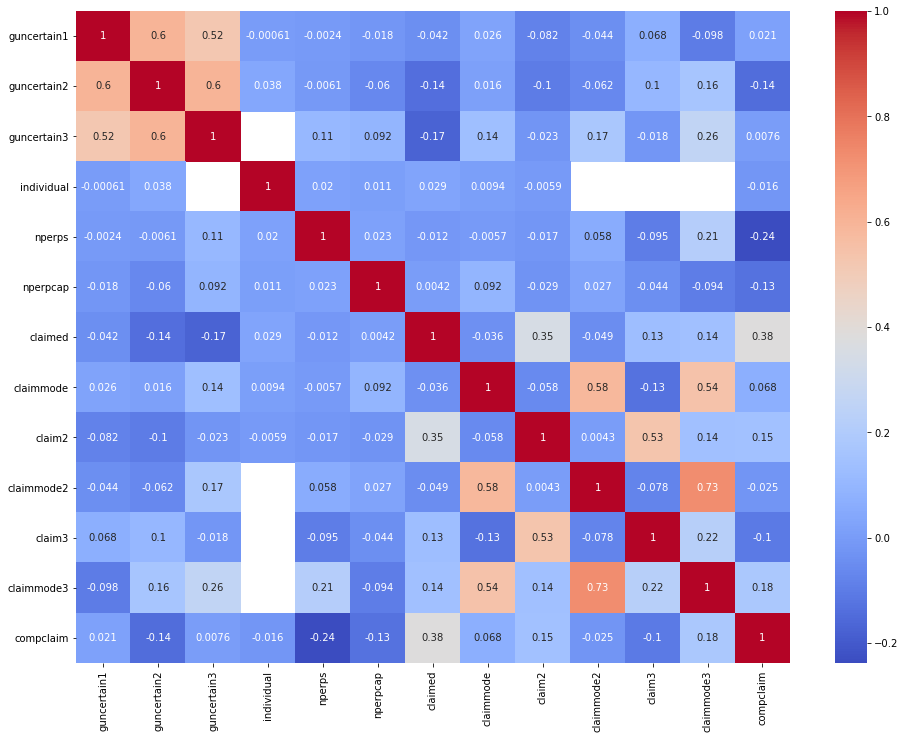

In [32]:
plt.figure(figsize=(16,12))
sns.heatmap(df4.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [33]:
#GROUP 5
df5 = df.iloc[:,81:101]
df5.head()

,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter
0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN
4,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN


In [34]:
df5.columns

Index(['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter'],
      dtype='object')

In [35]:
df5.isna().sum()

weaptype1                0
weaptype1_txt            0
weapsubtype1         20768
weapsubtype1_txt     20768
weaptype2           168564
weaptype2_txt       168564
weapsubtype2        170149
weapsubtype2_txt    170149
weaptype3           179828
weaptype3_txt       179828
weapsubtype3        179998
weapsubtype3_txt    179998
weaptype4           181618
weaptype4_txt       181618
weapsubtype4        181621
weapsubtype4_txt    181621
weapdetail           67670
nkill                10313
nkillus              64446
nkillter             66958
dtype: int64

In [36]:
df5.nunique()

weaptype1              12
weaptype1_txt          12
weapsubtype1           30
weapsubtype1_txt       30
weaptype2              11
weaptype2_txt          11
weapsubtype2           28
weapsubtype2_txt       28
weaptype3              10
weaptype3_txt          10
weapsubtype3           22
weapsubtype3_txt       22
weaptype4               5
weaptype4_txt           5
weapsubtype4           16
weapsubtype4_txt       16
weapdetail          19148
nkill                 205
nkillus                31
nkillter               96
dtype: int64

In [37]:
df5.describe()

,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter
count,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000
mean,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058
std,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,0.000000,0.000000,0.000000
50%,6.000000,12.000000,6.000000,7.000000,6.000000,7.000000,6.000000,9.500000,0.000000,0.000000,0.000000
75%,6.000000,16.000000,8.000000,18.000000,9.000000,20.000000,6.000000,16.000000,2.000000,0.000000,0.000000
max,13.000000,31.000000,13.000000,31.000000,13.000000,28.000000,12.000000,28.000000,1570.000000,1360.000000,500.000000


In [38]:
df5.corr()

,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter
weaptype1,1.000000,0.740493,0.140756,-0.059619,0.003986,-0.112474,0.056901,0.148021,0.004038,0.006908,0.042380
weapsubtype1,0.740493,1.000000,0.032709,-0.160508,0.005872,-0.095073,0.015669,0.009337,-0.070077,-0.001019,-0.036062
weaptype2,0.140756,0.032709,1.000000,0.911113,0.261191,0.274309,0.167278,0.271454,0.015878,0.005618,0.011324
weapsubtype2,-0.059619,-0.160508,0.911113,1.000000,0.190946,0.145600,0.072537,0.178127,0.010108,0.017787,-0.046590
weaptype3,0.003986,0.005872,0.261191,0.190946,1.000000,0.953294,0.254143,0.411955,0.026288,0.035091,-0.087847
weapsubtype3,-0.112474,-0.095073,0.274309,0.145600,0.953294,1.000000,0.447902,0.337638,0.018314,0.052181,-0.135906
weaptype4,0.056901,0.015669,0.167278,0.072537,0.254143,0.447902,1.000000,0.838155,0.093517,-0.200000,-0.130892
weapsubtype4,0.148021,0.009337,0.271454,0.178127,0.411955,0.337638,0.838155,1.000000,0.103275,-0.247953,-0.595013
nkill,0.004038,-0.070077,0.015878,0.010108,0.026288,0.018314,0.093517,0.103275,1.000000,0.487535,0.412111
nkillus,0.006908,-0.001019,0.005618,0.017787,0.035091,0.052181,-0.200000,-0.247953,0.487535,1.000000,0.004968


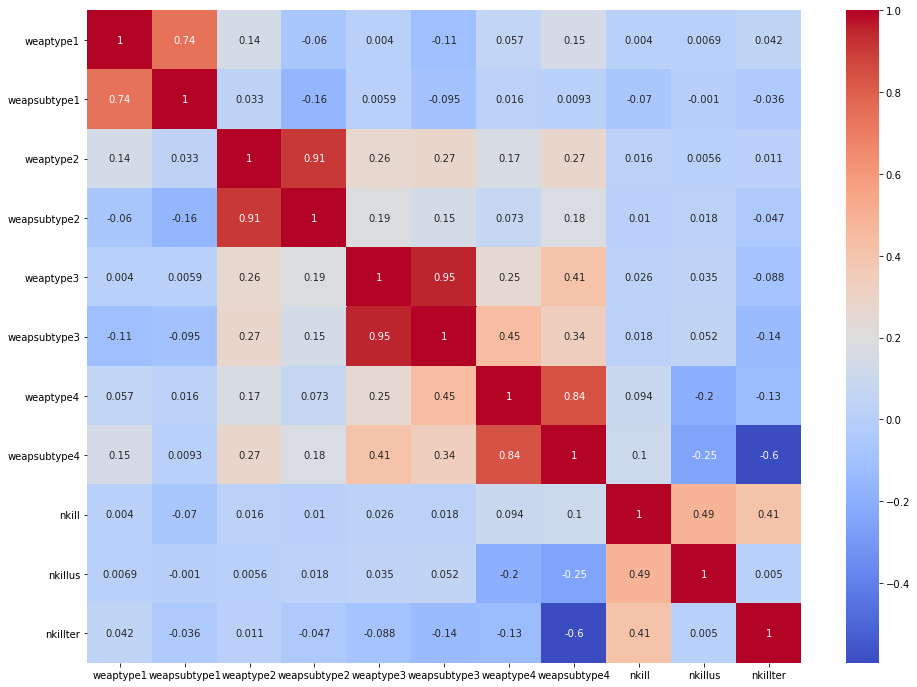

In [39]:
plt.figure(figsize=(16,12))
sns.heatmap(df5.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [40]:
#GROUP 6
df6 = df.iloc[:,101:121]
df6.head()

,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN
2,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [41]:
df6.columns

Index(['nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'],
      dtype='object')

In [42]:
df6.isna().sum()

nwound             16311
nwoundus           64702
nwoundte           69143
property               0
propextent        117626
propextent_txt    117626
propvalue         142702
propcomment       123732
ishostkid            178
nhostkid          168119
nhostkidus        168174
nhours            177628
ndays             173567
divert            181367
kidhijcountry     178386
ransom            104310
ransomamt         180341
ransomamtus       181128
ransompaid        180917
ransompaidus      181139
dtype: int64

In [43]:
df6.nunique()

nwound              238
nwoundus             44
nwoundte             44
property              3
propextent            4
propextent_txt        4
propvalue           659
propcomment       19157
ishostkid             3
nhostkid            209
nhostkidus           27
nhours               35
ndays               328
divert              143
kidhijcountry       217
ransom                3
ransomamt           429
ransomamtus          23
ransompaid          156
ransompaidus          8
dtype: int64

In [44]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
nwound,165380.0,3.167668e+00,3.594939e+01,0.0,0.0,0.0,2.0000,8.191000e+03
nwoundus,116989.0,3.894383e-02,3.057361e+00,0.0,0.0,0.0,0.0000,7.510000e+02
nwoundte,112548.0,1.071632e-01,1.488881e+00,0.0,0.0,0.0,0.0000,2.000000e+02
property,181691.0,-5.445564e-01,3.122889e+00,-9.0,0.0,1.0,1.0000,1.000000e+00
propextent,64065.0,3.295403e+00,4.869119e-01,1.0,3.0,3.0,4.0000,4.000000e+00
propvalue,38989.0,2.088119e+05,1.552463e+07,-99.0,-99.0,-99.0,1000.0000,2.700000e+09
ishostkid,181513.0,5.905362e-02,4.612443e-01,-9.0,0.0,0.0,0.0000,1.000000e+00
nhostkid,13572.0,4.533230e+00,2.023164e+02,-99.0,1.0,2.0,4.0000,1.700000e+04
nhostkidus,13517.0,-3.539987e-01,6.835645e+00,-99.0,0.0,0.0,0.0000,8.600000e+01
nhours,4063.0,-4.679393e+01,8.280041e+01,-99.0,-99.0,-99.0,0.0000,9.990000e+02


In [45]:
df6.corr()

,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus
nwound,1.000000,0.152278,0.038568,-0.013406,-0.023914,0.090562,-0.001712,0.035770,0.142196,0.013731,-0.028855,0.001661,-0.002114,-0.009149,-0.012700,-0.016472
nwoundus,0.152278,1.000000,0.000225,0.004924,-0.009930,0.469664,-0.000027,0.006480,-0.103280,0.085444,0.011776,0.007730,-0.006479,-0.002853,-0.002095,-0.002435
nwoundte,0.038568,0.000225,1.000000,-0.012788,0.024351,-0.000764,-0.010300,0.002279,0.000922,0.019496,0.000018,0.012104,0.005565,NaN,-0.002819,NaN
property,-0.013406,0.004924,-0.012788,1.000000,-0.325593,0.001317,0.018890,-0.014581,0.028323,0.116160,0.035619,0.238277,0.000270,-0.027844,0.005299,0.017164
propextent,-0.023914,-0.009930,0.024351,-0.325593,1.000000,-0.054846,0.013946,0.041083,-0.058765,0.105193,0.024145,-0.099057,0.200551,0.413058,0.243261,-0.060871
propvalue,0.090562,0.469664,-0.000764,0.001317,-0.054846,1.000000,0.000273,-0.016313,0.036954,0.061712,0.036346,0.000895,-0.038233,-0.026822,-0.038802,-0.020750
ishostkid,-0.001712,-0.000027,-0.010300,0.018890,0.013946,0.000273,1.000000,0.000323,-0.000807,0.000725,0.008608,-0.160358,0.010721,NaN,-0.008226,NaN
nhostkid,0.035770,0.006480,0.002279,-0.014581,0.041083,-0.016313,0.000323,1.000000,-0.003381,0.005016,-0.003566,0.004645,0.058839,-0.008584,0.014320,-0.015470
nhostkidus,0.142196,-0.103280,0.000922,0.028323,-0.058765,0.036954,-0.000807,-0.003381,1.000000,0.018421,0.030089,0.043555,0.008505,0.011408,0.004727,0.020845
nhours,0.013731,0.085444,0.019496,0.116160,0.105193,0.061712,0.000725,0.005016,0.018421,1.000000,0.201933,0.154233,0.097667,-0.077127,0.126789,0.291390


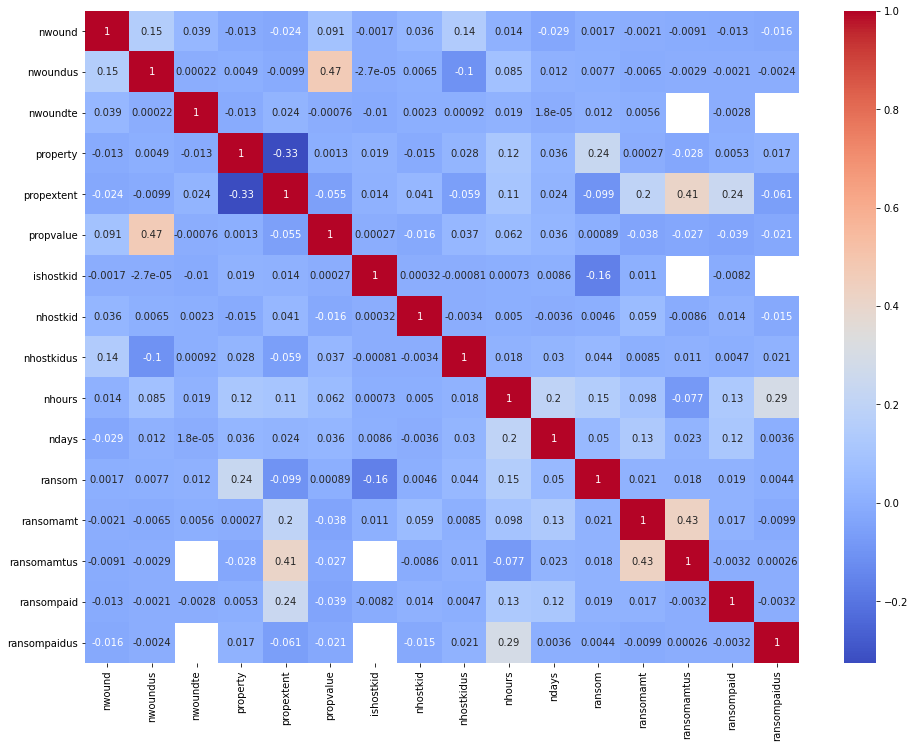

In [46]:
plt.figure(figsize=(16,12))
sns.heatmap(df6.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [47]:
#GROUP 7
df7 = df.iloc[:,121:]
df7.head()

,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [48]:
df7.columns

Index(['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object')

In [49]:
df7.isna().sum()

ransomnote            181177
hostkidoutcome        170700
hostkidoutcome_txt    170700
nreleased             171291
addnotes              153402
scite1                 66191
scite2                104758
scite3                138175
dbsource                   0
INT_LOG                    0
INT_IDEO                   0
INT_MISC                   0
INT_ANY                    0
related               156653
dtype: int64

In [50]:
df7.nunique()

ransomnote              387
hostkidoutcome            7
hostkidoutcome_txt        7
nreleased               156
addnotes              15429
scite1                83988
scite2                62263
scite3                36090
dbsource                 26
INT_LOG                   3
INT_IDEO                  3
INT_MISC                  3
INT_ANY                   3
related               14306
dtype: int64

In [51]:
df7.describe()

,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df7.corr()

,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
hostkidoutcome,1.000000,-0.555478,-0.015442,-0.016234,-0.119776,-0.061946
nreleased,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193
INT_ANY,-0.061946,0.064759,0.891051,0.893811,0.252193,1.000000


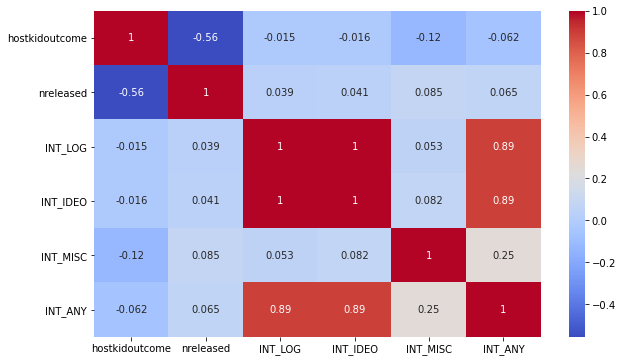

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df7.corr(), cmap = 'coolwarm', annot = True)
plt.show()

# DATA CLEANING
Features with 30% null values and also redundant features will be dropped

In [54]:
df=  df.drop(columns= ['approxdate','resolution','location'])
df=  df.drop(columns=['alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','targsubtype1','targsubtype1_txt'])
df=  df.drop(columns= ['targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt',
       'gname2'])
df=  df.drop(columns= ['gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain2', 'guncertain3',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim'])
df=  df.drop(columns= ['weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt'])
df=  df.drop(columns= ['propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'])
df=  df.drop(columns= ['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite2', 'scite3', 'related'])


In [55]:
df= df.drop(columns=['provstate', 'eventid', 'latitude','individual', 'nperps', 'nperpcap', 'weapsubtype1','weapsubtype1_txt','nkillus', 'nkillter','dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2','crit3', 'doubtterr', 'multiple','corp1','weapdetail','nwoundus', 'nwoundte','ishostkid', 'scite1'])

In [56]:
df= df.drop(columns=['gsubname'])

In [57]:
#CHECKING FOR THE NUMBER OF FEATURES
df.shape

(181691, 25)

In [58]:
#CHECKING FOR THE COLUMN NAMES
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'city', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'weaptype1', 'weaptype1_txt',
       'nkill', 'nwound', 'property'],
      dtype='object')

# RENAMING SOME FEATURES

In [59]:
dff= df.rename({'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Name of Country', 'region_txt': 'Region', 'city': 'City', 'success': 'Success', 'attacktype1_txt': 'Attack Type', 'targtype1_txt': 'Target Type', 'natlty1_txt': 'Nationality', 'gname': 'Attack Group', 'weaptype1_txt': 'Weapon Type','nkill': 'No Killed', 'nwound': 'No Wounded', 'property': 'Property' }, axis = 1)

In [60]:
#CHECKING FOR MISSING VALUES
dff.isna().sum()

Year                   0
Month                  0
Day                    0
extended               0
country                0
Name of Country        0
region                 0
Region                 0
City                 434
Success                0
suicide                0
attacktype1            0
Attack Type            0
targtype1              0
Target Type            0
target1              636
natlty1             1559
Nationality         1559
Attack Group           0
guncertain1          380
weaptype1              0
Weapon Type            0
No Killed          10313
No Wounded         16311
Property               0
dtype: int64

In [61]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   extended         181691 non-null  int64  
 4   country          181691 non-null  int64  
 5   Name of Country  181691 non-null  object 
 6   region           181691 non-null  int64  
 7   Region           181691 non-null  object 
 8   City             181257 non-null  object 
 9   Success          181691 non-null  int64  
 10  suicide          181691 non-null  int64  
 11  attacktype1      181691 non-null  int64  
 12  Attack Type      181691 non-null  object 
 13  targtype1        181691 non-null  int64  
 14  Target Type      181691 non-null  object 
 15  target1          181055 non-null  object 
 16  natlty1          180132 non-null  floa

In [62]:
dff.count()

Year               181691
Month              181691
Day                181691
extended           181691
country            181691
Name of Country    181691
region             181691
Region             181691
City               181257
Success            181691
suicide            181691
attacktype1        181691
Attack Type        181691
targtype1          181691
Target Type        181691
target1            181055
natlty1            180132
Nationality        180132
Attack Group       181691
guncertain1        181311
weaptype1          181691
Weapon Type        181691
No Killed          171378
No Wounded         165380
Property           181691
dtype: int64

In [63]:
#CHECKING FOR NUMBER OF ELEMENTS IN EACH UNIQUE FEATURE
dff.nunique()

Year                  47
Month                 13
Day                   32
extended               2
country              205
Name of Country      205
region                12
Region                12
City               36674
Success                2
suicide                2
attacktype1            9
Attack Type            9
targtype1             22
Target Type           22
target1            86006
natlty1              215
Nationality          215
Attack Group        3537
guncertain1            2
weaptype1             12
Weapon Type           12
No Killed            205
No Wounded           238
Property               3
dtype: int64

In [64]:
#CHECKING FOR THE DATA TYPE OF THE DATASET
dff.dtypes

Year                 int64
Month                int64
Day                  int64
extended             int64
country              int64
Name of Country     object
region               int64
Region              object
City                object
Success              int64
suicide              int64
attacktype1          int64
Attack Type         object
targtype1            int64
Target Type         object
target1             object
natlty1            float64
Nationality         object
Attack Group        object
guncertain1        float64
weaptype1            int64
Weapon Type         object
No Killed          float64
No Wounded         float64
Property             int64
dtype: object

# TREATING FOR MISSING VALUES

In [65]:
#TREATING FOR MISSING VALUES WITH OBJECT AS DATA TYPE
dff['City'].fillna('Unknown',inplace=True)
dff['target1'].fillna('Unknown',inplace=True)
dff['Nationality'].fillna('Unknown',inplace=True)


In [66]:
#TREATING FOR MISSING VALUES WITH FLOAT/INT AS DATA TYPE
#The following features will be treated my filling with their median values due to the features having high values as standard deviation compared to their mean values
dff['natlty1'].fillna(value=dff['natlty1'].median(), inplace=True)
dff['No Killed'].fillna(value=dff['No Killed'].median(), inplace=True)
dff['No Wounded'].fillna(value=dff['No Wounded'].median(), inplace=True)


In [67]:
dff['guncertain1'].fillna(value=dff['guncertain1'].median(), inplace=True)

In [68]:
#CHECKING TO CONFIRM THAT ALL MISSING VALUES HAS BEEN TREATED
dff.isna().sum()

Year               0
Month              0
Day                0
extended           0
country            0
Name of Country    0
region             0
Region             0
City               0
Success            0
suicide            0
attacktype1        0
Attack Type        0
targtype1          0
Target Type        0
target1            0
natlty1            0
Nationality        0
Attack Group       0
guncertain1        0
weaptype1          0
Weapon Type        0
No Killed          0
No Wounded         0
Property           0
dtype: int64

# DATA VISUALIZATION

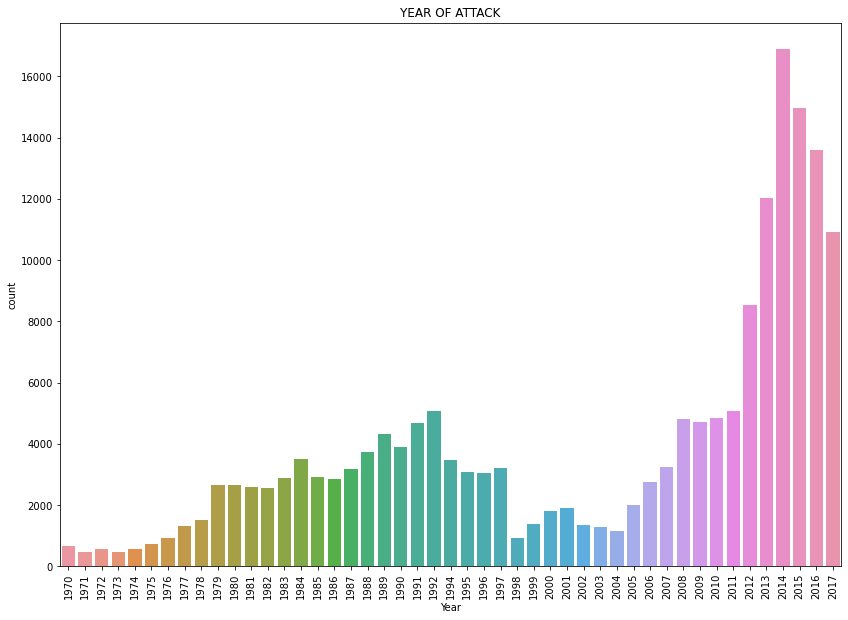

In [69]:
#YEAR
plt.figure(figsize=(14,10))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x=dff['Year'].sort_values(), data= df)
plt.title('YEAR OF ATTACK')
plt.show()

In [70]:
#FROM THE CHAT WE CAN SEE AS THE YEAR GOES BY THE RATE OF GLOBAL TERRORISM INCREASED 
#WITH YEAR 2014 RECORDING THE HIGHEST RATE OF GLOBAL TERRORISM 
#WHILE YEAR 1971 WITH THE LEAST RECORDED GLOBAL TERRORISM

In [71]:
#COUNTRY
country = pd.DataFrame(dff.groupby('Name of Country')['Name of Country'].size().sort_values(ascending=False))
country.columns = ['Count']
country_df = country.head(20)
country_df

,Count
Name of Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


In [72]:
#Iraq,Pakistan,Afghanistan lead as the countries with the highest reported cases of global terrorism

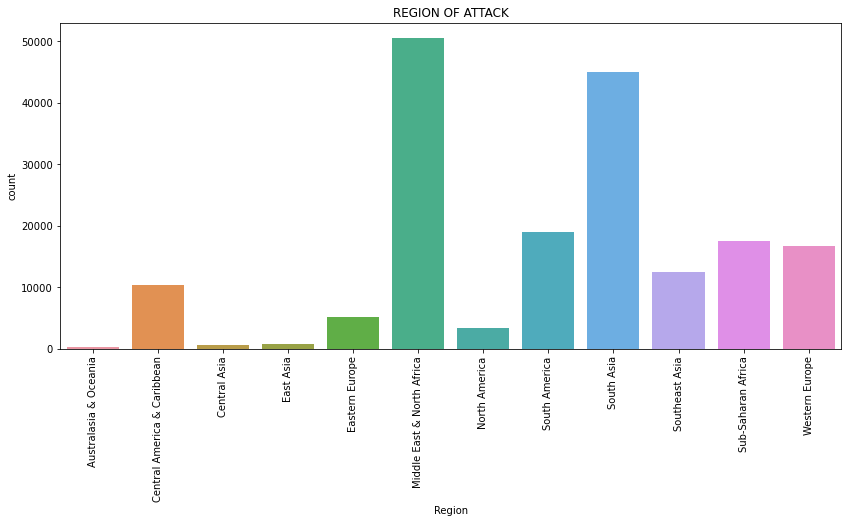

In [73]:
#REGION
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= dff['Region'].sort_values(), data= dff)
plt.title('REGION OF ATTACK')
plt.show()

In [74]:
#The regions with the most occurence of global terrorism are Middle East& North Africa and South Asia 
#While Australasia and Oceania is the least region with terrorism attack

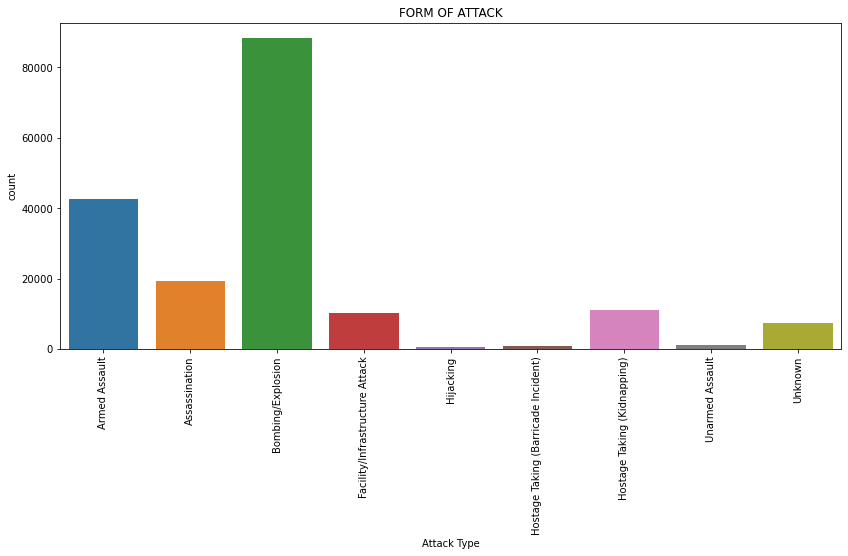

In [75]:
#ATTACK TYPE
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= dff['Attack Type'].sort_values(), data= dff)
plt.title('FORM OF ATTACK')
plt.show()

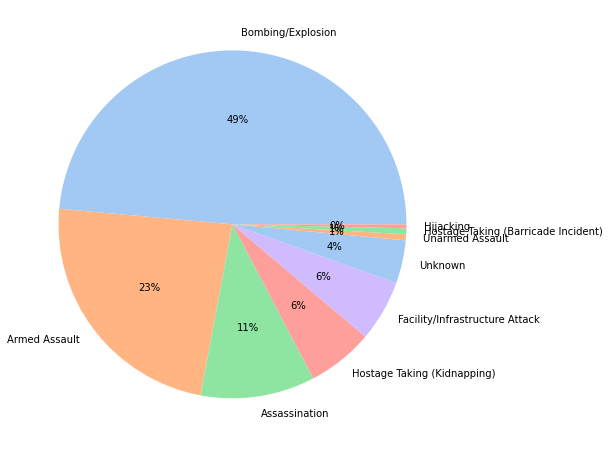

In [76]:
#Pie chart for attack type data
attack = pd.DataFrame(dff.groupby('Attack Type')['Attack Type'].size().sort_values(ascending=False))
attack.columns = ['Count']

labels = list(attack.index)
#Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#Create pie chart
plt.figure(figsize=(8,8))
plt.pie(attack['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [77]:
#The predominant form of attack in global terrorism has been carried out by the use of Bombing/Explosion (49%) followed by Armed Assault 
#While Hijacking has been the least form used

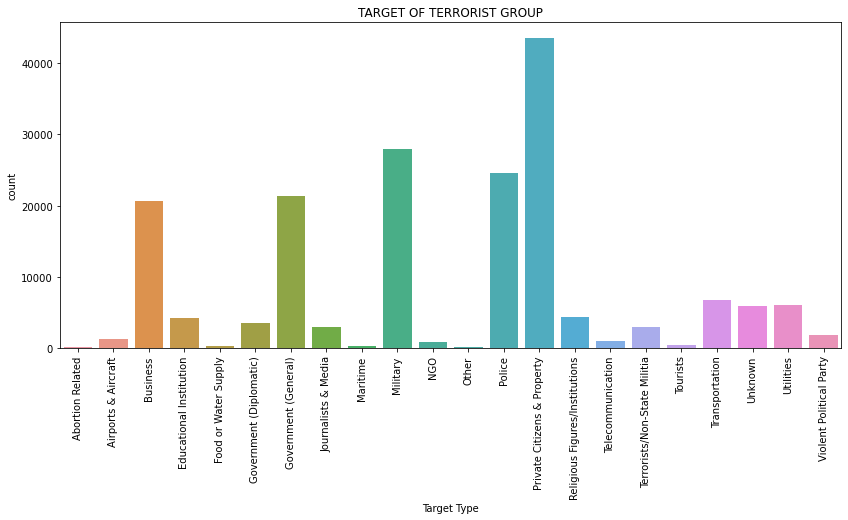

In [78]:
#Target Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= dff['Target Type'].sort_values(), data= dff)
plt.title('TARGET OF TERRORIST GROUP')
plt.show()

In [79]:
#The most targeted area of global terrorism has been Private Citizens & Property followed by the Military and the Police

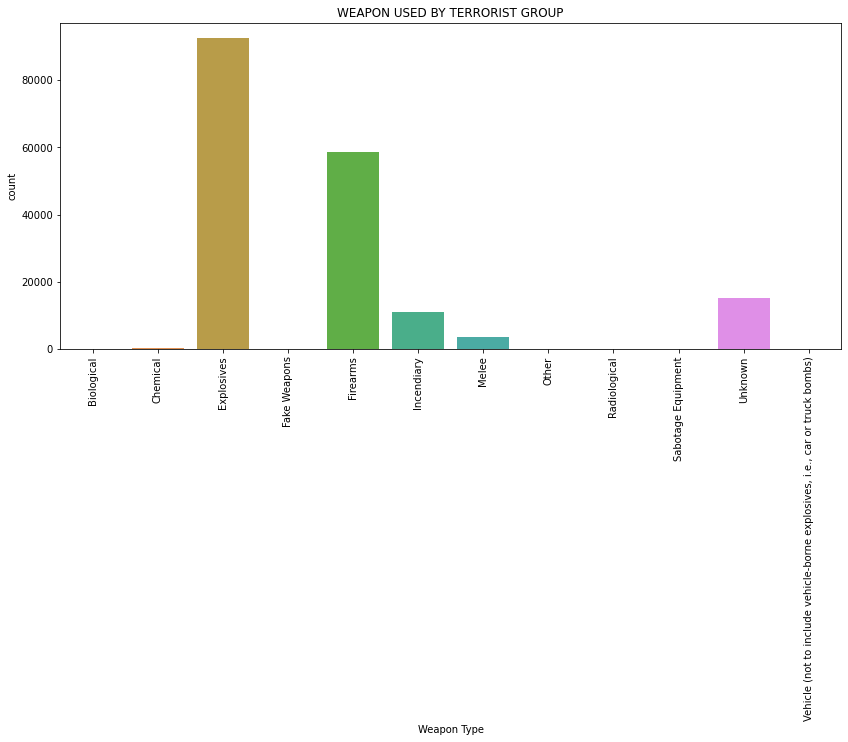

In [80]:
#Weapon Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= dff['Weapon Type'].sort_values(), data= dff)
plt.title('WEAPON USED BY TERRORIST GROUP')
plt.show()

In [81]:
#Explosives and firearms constitute the most weapon used in global terrorism

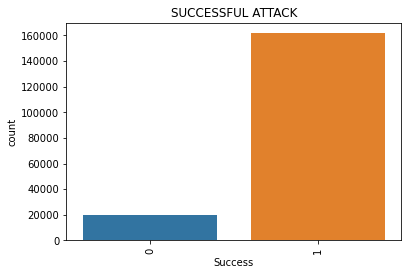

In [82]:
#Success in Attack
plt.figure(figsize=(6,4))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= dff['Success'].sort_values(), data= dff)
plt.title('SUCCESSFUL ATTACK')
plt.show()

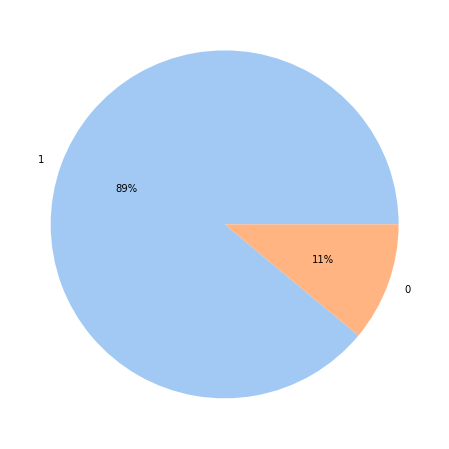

In [83]:
#Determining the success rates of global terrorism attacks
success = pd.DataFrame(dff.groupby('Success')['Success'].size().sort_values(ascending=False))
success.columns = ['Count']

labels = list(success.index)
#Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#Create pie chart
plt.figure(figsize=(8,8))
plt.pie(success['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [84]:
#89% of global terrorism attacks were successful over 47 years.

In [85]:
#Deaths Toll
No_Deaths = pd.DataFrame(dff.groupby('No Killed')['Region'].size().sort_values(ascending=True))
No_Deaths.columns = ['Count']
No_Deaths_df = No_Deaths.head(20)
No_Deaths_df

,Count
No Killed,
1570.0,1
212.0,1
210.0,1
208.0,1
205.0,1
188.0,1
184.0,1
171.0,1
168.0,1


In [86]:
#The highest record of death during an attck has the figure as 1570

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


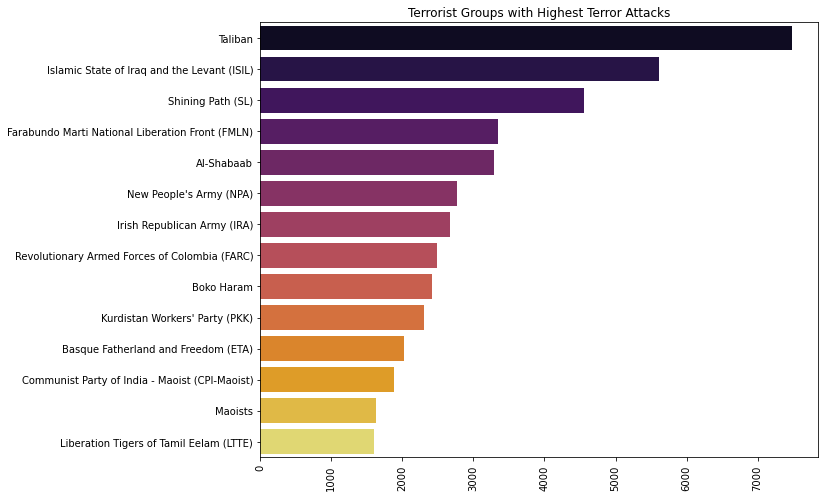

In [87]:
#Terrorist Group
sns.barplot(dff['Attack Group'].value_counts()[1:15].values,dff['Attack Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In [88]:
#THE TALIBANS ARE THE MOST DEADLIEST OF ALL TERRORIST GROUPS AS CAN BE SEEN ABOVE

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Countries')

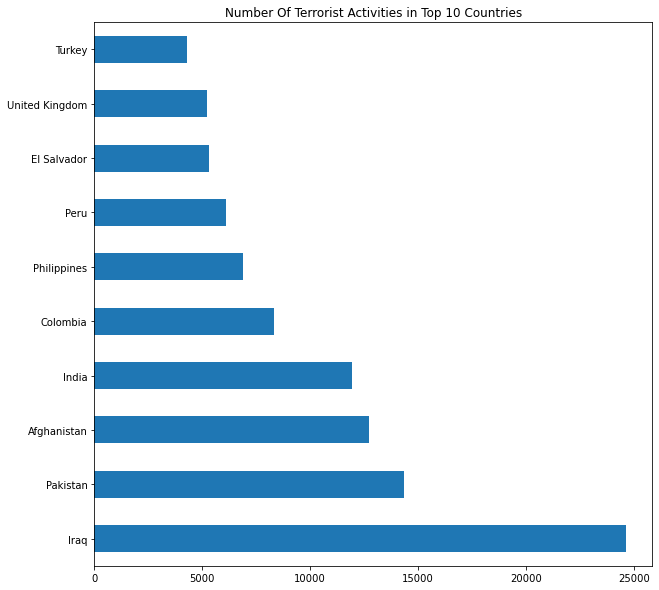

In [89]:
#Terrorist attack by Countries
dff['Name of Country'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Countries')

In [90]:
#Iraq,Pakistan,Afghanistan lead as the countries with the highest reported cases of global terrorism

# DATA PREPROCESSING

In [91]:
#The independent variables will be tagged predictors_df while the dependent variable will be tagged target_df
predictors_df = dff.drop(columns='Success')
target_df = dff['Success']
predictors_df.shape

(181691, 24)

In [92]:
predictors_df.dtypes

Year                 int64
Month                int64
Day                  int64
extended             int64
country              int64
Name of Country     object
region               int64
Region              object
City                object
suicide              int64
attacktype1          int64
Attack Type         object
targtype1            int64
Target Type         object
target1             object
natlty1            float64
Nationality         object
Attack Group        object
guncertain1        float64
weaptype1            int64
Weapon Type         object
No Killed          float64
No Wounded         float64
Property             int64
dtype: object

In [93]:
#The following columns will be dropped from the predictors_df because it has object as it data type, it was done so as to rescale the dataset
independent_var_df = predictors_df.drop(columns = ['Name of Country','Region','City','Attack Type','Target Type','target1','Nationality','Weapon Type','Attack Group'], axis=1)
independent_var_df.shape

(181691, 15)

# RESCALING OF THE DATASET

In [94]:
#Rescaling of the dataset was done due to the large differnce between the minimum and maximum values across the entire dataset
#For the rescaling the feature_range will be from 0 t0 1 
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_df = pd.DataFrame(scaler.fit_transform(independent_var_df), columns= independent_var_df.columns)
rescaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,0.694447,0.282116,0.0,0.446809,0.829787,0.936170,1.0
Month,181691.0,0.538940,0.282359,0.0,0.333333,0.500000,0.750000,1.0
Day,181691.0,0.500182,0.284324,0.0,0.258065,0.483871,0.741935,1.0
extended,181691.0,0.045346,0.208063,0.0,0.000000,0.000000,0.000000,1.0
country,181691.0,0.127969,0.112415,0.0,0.074000,0.094000,0.156000,1.0
region,181691.0,0.560085,0.266673,0.0,0.363636,0.454545,0.818182,1.0
suicide,181691.0,0.036507,0.187549,0.0,0.000000,0.000000,0.000000,1.0
attacktype1,181691.0,0.280943,0.239471,0.0,0.125000,0.250000,0.250000,1.0
targtype1,181691.0,0.354272,0.316849,0.0,0.095238,0.142857,0.619048,1.0
natlty1,181691.0,0.123457,0.088949,0.0,0.079000,0.097000,0.164000,1.0


# NORMALIZATION

In [95]:
#From the visualization of the distribution using histogram it can be seen that some features in the dataset were not normal
#Therefore normalization was done to remove skewness from the dataset
scaler = Normalizer()
normalized_df = pd.DataFrame(scaler.fit_transform(rescaled_df), columns= rescaled_df.columns)
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,0.386285,0.151915,0.0,0.263565,0.422754,0.501524,0.887348
Month,181691.0,0.300173,0.151931,0.0,0.174835,0.305151,0.421735,0.818411
Day,181691.0,0.278254,0.153656,0.0,0.148665,0.282200,0.403265,0.824486
extended,181691.0,0.020852,0.096207,0.0,0.000000,0.000000,0.000000,0.758705
country,181691.0,0.072582,0.062946,0.0,0.040523,0.059108,0.094943,0.674961
region,181691.0,0.310252,0.143509,0.0,0.215613,0.319406,0.427844,0.784552
suicide,181691.0,0.017782,0.091775,0.0,0.000000,0.000000,0.000000,0.733341
attacktype1,181691.0,0.151560,0.116287,0.0,0.077001,0.132568,0.161946,0.735907
targtype1,181691.0,0.193526,0.170336,0.0,0.047872,0.100885,0.343002,0.702733
natlty1,181691.0,0.069872,0.048080,0.0,0.041939,0.059904,0.097702,0.691464


In [96]:
normalized_df.head()

,Year,Month,Day,extended,country,region,suicide,attacktype1,targtype1,natlty1,guncertain1,weaptype1,No Killed,No Wounded,Property
0,0.0,0.365172,0.040388,0.0,0.033804,0.056910,0.0,0.000000,0.387529,0.033804,0.0,0.626009,0.000399,0.0,0.563408
1,0.0,0.000000,0.000000,0.0,0.083110,0.000000,0.0,0.412254,0.188459,0.011213,0.0,0.659607,0.000000,0.0,0.593646
2,0.0,0.056151,0.000000,0.0,0.105114,0.245021,0.0,0.000000,0.288775,0.143521,0.0,0.673809,0.000429,0.0,0.606428
3,0.0,0.062452,0.000000,0.0,0.055458,0.476909,0.0,0.187357,0.214122,0.159628,0.0,0.312262,0.000000,0.0,0.749428
4,0.0,0.057227,0.000000,0.0,0.066612,0.187287,0.0,0.515040,0.196206,0.146271,0.0,0.400587,0.000000,0.0,0.686720


# SPLITTING DATASET INTO TRAIN AND TEST

In [97]:
x_train, x_test, y_train, y_test = train_test_split(normalized_df,target_df, test_size=0.3, random_state=42)

# HANDLING IMBALANCE IN DATASET

In [98]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [99]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(normalized_df, target_df)

# MODELLING

In [100]:
#RANDOM FOREST CLASSIFIER
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_smote, y_train_smote)
y_pred = clf.predict(x_test)

In [101]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(clf, x_smote, y_smote, cv=kfold)

In [102]:
#LOGISTIC REGRESSION 
lR = LogisticRegression()
lR.fit(x_train_smote, y_train_smote)
y_pred = clf.predict(x_test)

# MODEL EVALUATION

In [103]:
#RANDOM FOREST CLASSIFIER
results = cross_val_score(clf, x_smote, y_smote, cv=kfold)
print('The RF accuracy score is: ',(results.mean()*100))
print('The standard deviation score is:',(results.std()*100))

The RF accuracy score is:  96.84406569544599
The standard deviation score is: 0.12023362359599991


In [104]:
#RANDOM FOREST CLASSIFIER
print('RF Train Score is : ' , clf.score(x_train_smote, y_train_smote))
print('RF Test Score is : ' , clf.score(x_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('RF Model accuracy is: ', accuracy)

RF Train Score is :  0.9990721266856365
RF Test Score is :  0.9440082189770309
RF Model accuracy is:  0.9440082189770309


# MODEL PERFORMANCE METRICS

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test.values,y_pred)
print(cm)

[[ 4565  1473]
 [ 1579 46891]]


In [106]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      6038
           1       0.97      0.97      0.97     48470

    accuracy                           0.94     54508
   macro avg       0.86      0.86      0.86     54508
weighted avg       0.94      0.94      0.94     54508



In [107]:
#LOGISTIC REGRESSION
print('LR Train Score is : ' , lR.score(x_train_smote, y_train_smote))
print('LR Test Score is : ' , lR.score(x_test, y_test))
accuracy2 = accuracy_score(y_test, y_pred)
print('LR Model accuracy is: ', accuracy2)

LR Train Score is :  0.6231287888160336
LR Test Score is :  0.563843839436413
LR Model accuracy is:  0.9440082189770309


In [108]:
import pickle
pickle_out = open("clf.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()